HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

Test the new method to normalise for GeneralModel.
In practice all the model are normalised using the value of the Mass scale ($M_s$) at certain radius $r_s$.
By default if $r_s$ is not provided $M_s$ is considered the mass at the last considered radius.
In this way we can define a model using the value of the mass at certain radius as the $M_{200}$ and $r_{200}$.

In [12]:
%matplotlib inline  
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
label_size =20
mpl.rcParams.update({'figure.autolayout':True})
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 
mpl.rcParams['mathtext.default']='regular'
from astropy.constants import G as conG
from OpOp.Model import Plummer2D, Plummer, Sersic, Isothermal, Tbetamodel, TruncatedPlummer, NbodyModel
from OpOp.analysis import Analysis, Profile
from OpOp.io import write_snap

In [85]:
#NFW-core
rc_halo=0.3258 
gamma_halo=0
beta_halo=3
mm_halo=10**8.7161#Mass at rm_halo
rmax=50 #rmax halo
rmin=0.001
rini=rmin/rc_halo
rfin=rmax/rc_halo

In [86]:
mh=Tbetamodel(rc=rc_halo,rt=None,Mmax=mm_halo,rs=2,gamma=gamma_halo,beta=beta_halo,rini=rmin,rfin=rmax,r_physic=True)
print(mh)
mh2=Tbetamodel(rc=rc_halo,rt=10,Mmax=mm_halo,rs=2,gamma=gamma_halo,beta=beta_halo,rini=rmin,rfin=rmax,r_physic=True)
print(mh2)

Warning keyword Mmax is deprecated for TbetaModel, use instead Ms

Model: TbetaModel
gamma: 0.00
beta: 3.00
rc: 0.326
rt: 100.000 (physical)  306.937 (normalised)
rini: 0.001 (physical)  0.003 (normalised)
rfin: 50.000 (physical)  153.468 (normalised)
Mass: 5.201e+08 at scale radius rs: 2.000
Total Mass: 2.432e+09 at last radius: 50.000
use_c set to False
use_nparray set to False

Warning keyword Mmax is deprecated for TbetaModel, use instead Ms

Model: TbetaModel
gamma: 0.00
beta: 3.00
rc: 0.326
rt: 10.000 (physical)  30.694 (normalised)
rini: 0.001 (physical)  0.003 (normalised)
rfin: 50.000 (physical)  153.468 (normalised)
Mass: 5.201e+08 at scale radius rs: 2.000
Total Mass: 1.281e+09 at last radius: 50.000
use_c set to False
use_nparray set to False



In [90]:
R=np.logspace(np.log10(0.001),np.log10(30),1000)

In [104]:
dens=mh.dens(R)
dens2=mh2.dens(R)

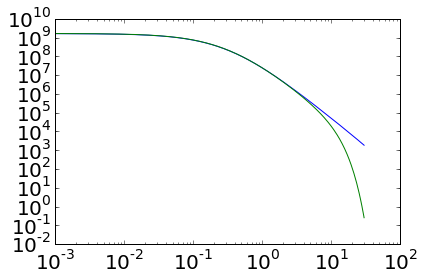

In [105]:
plt.plot(R,dens)
plt.plot(R,dens2)
plt.ylim(1e-2,1e10)
plt.xscale('log')
plt.yscale('log')
plt.show()

test model generation

In [106]:
dm={'type':1, 'model':mh2,'npart':int(1e5)}
a=NbodyModel([dm,],xmin=rmin,xmax=rmax,r_physic=True)

In [107]:
p=a.generate(use_c=True, po=None,vo=None,mq=70,set_vel=True)

***Generate ICS: Start***
-Component id:0 type:1 Npart=100000
     Generate Positions:      Done
     Generate Velocities:      Done
     Done in 0.256


In [113]:
aa=Analysis(p,safe=False,auto_centre=True)
prof=Profile(p,xmin=0.001,xmax=50,ngrid=512,kind='lin',type=1)

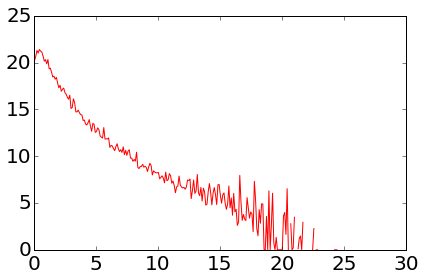

In [114]:
arr=prof.vdisp2d(pax='x',ret=True,func=True,s=None)[0]
r=arr[:,0]
vd=arr[:,1]
plt.plot(r,vd,label='Vdx 2D',c='red')

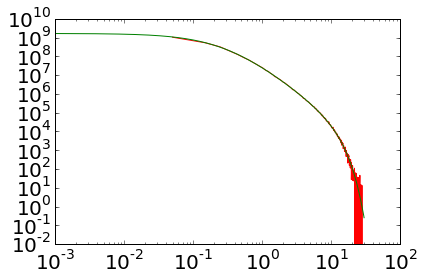

In [115]:
arr=prof.dens()[0]
r=arr[:,0]
d=arr[:,1]
plt.plot(r,d,label='dens',c='red')
plt.plot(R,dens2)
plt.ylim(1e-2,1e10)
plt.xscale('log')
plt.yscale('log')
plt.show()